In [5]:
import numpy as np
from matplotlib import pyplot as plt
from otimo import gradiente, SecaoAurea, GradienteConjugado, QuasiNewton

# Método do Gradiente Conjugado

## Definição da função-objetivo: função Rosenbrock

\begin{equation}
    \min\limits_{\mathbf{x}} f(\mathbf{x}) = 100(x_2-x_1^2)^2 + (1-x_1)^2
\end{equation}

Onde a solução-ótima é $f(\mathbf{x}) = 0$ em $\mathbf{x} = \langle 1, 1 \rangle$.

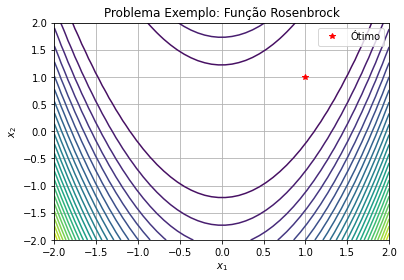

In [5]:
# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]
    return 100*(x2-x1**2)**2 + (1-x1)**2

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Avalia função para plotar contorno
f = 100*(x2-x1**2)**2 + (1-x1)**2

# Plota contorno
plt.contour(x1, x2, f, levels=30)
plt.plot([1.], [1.], '*r', label='Ótimo')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo: Função Rosenbrock')
plt.grid()
plt.show()

## Fórmula Fletcher-Reeves

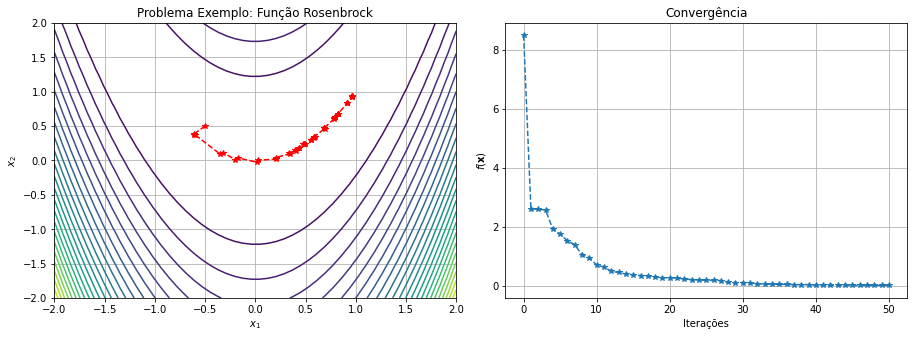

In [26]:
# Definição do ponto inicial
x0 = np.zeros((2, 1))
x0[0] = -.5
x0[1] = .5

# Variáveis iniciais
x = x0.copy()
fx = func(x)
xhist = [x0.copy()]
fxhist = [fx]

# Primeira estimativa do gradiente
r = -gradiente(x, func, fx=fx)[0]
d = r.copy()

# Critério de parada: número de iterações
for it in range(50):
    
    # Função de otimização unidimensional
    def theta(a):
        return func(x + a*d)

    # Determina o passo ótimo    
    alpha, _ = SecaoAurea(passo=1e-3).resolva(theta)
    
    # Dá o passo
    x = x + alpha * d
    fx = func(x) # Avalia a função no novo ponto

    # Registra o histórico
    xhist.append(x.copy())
    fxhist.append(fx)
    
    # Salvo a informação do resíduo antes de calcular o próximo
    ranterior = r.copy() # Guarda valor anterior
    ranterior = ranterior.reshape((-1, 1))
    
    # Cálculo do novo resíduo (gradiente)
    r = -gradiente(x, func, fx=fx)[0] # Estima novo gradiente
    r = r.reshape((-1, 1)) # Vetor-coluna
    
    # Cálculo do conjugado do gradiente
    beta = float(r.T@r/(ranterior.T@ranterior))

    # Atualiza a direção de busca
    d = r.reshape(d.shape) + beta*d
   
    # Verifica iterações
    if np.mod(it+1, x.size) == 0:
        d = r.reshape(d.shape).copy()
        
# Converte o tipo das variáveis
xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo: Função Rosenbrock')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()

## Fórmula Polak-Ribière

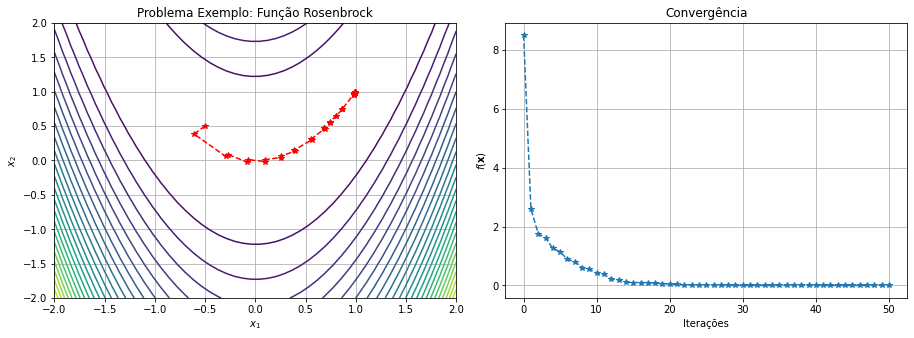

In [27]:
# Definição do ponto inicial
x0 = np.zeros((2, 1))
x0[0] = -.5
x0[1] = .5

# Variáveis iniciais
x = x0.copy()
fx = func(x)
xhist = [x0.copy()]
fxhist = [fx]

# Primeira estimativa do gradiente
r = -gradiente(x, func, fx=fx)[0]
d = r.copy()

# Critério de parada: número de iterações
for it in range(50):
    
    # Função de otimização unidimensional
    def theta(a):
        return func(x + a*d)

    # Determina o passo ótimo    
    alpha, _ = SecaoAurea(passo=1e-3).resolva(theta)
    
    # Dá o passo
    x = x + alpha * d
    fx = func(x) # Avalia a função no novo ponto

    # Registra o histórico
    xhist.append(x.copy())
    fxhist.append(fx)
    
    # Salvo a informação do resíduo antes de calcular o próximo
    ranterior = r.copy() # Guarda valor anterior
    ranterior = ranterior.reshape((-1, 1))
    
    # Cálculo do novo resíduo (gradiente)
    r = -gradiente(x, func, fx=fx)[0] # Estima novo gradiente
    r = r.reshape((-1, 1)) # Vetor-coluna
    
    # Cálculo do conjugado do gradiente
    beta = float(r.T@(r-ranterior)/(ranterior.T@ranterior))

    # Atualiza a direção de busca
    d = r.reshape(d.shape) + beta*d
   
    # Verifica iterações
    if np.mod(it+1, x.size) == 0:
        d = r.reshape(d.shape).copy()
        
# Converte o tipo das variáveis
xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo: Função Rosenbrock')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()

## Função quadrática

### Aplicação do Método do Gradiente Conjugado

Solução ótima: [0.98806453 2.99401267]
Número de iterações: 2
Número de avaliações: 52


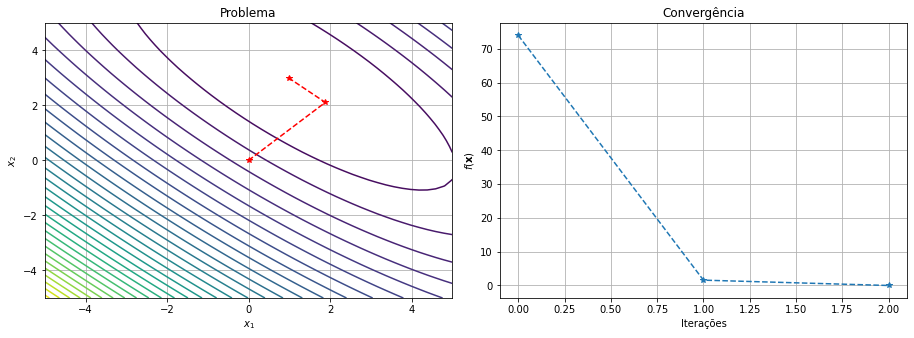

In [3]:
# Definição da função objetivo
def quadratica(x):
    x1, x2 = x[0], x[1]
    return (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

x0 = [0, 0]

solucao = GradienteConjugado(SecaoAurea(precisao=1e-2, passo=1e-3), maxit=2,
                             maxaval=5000).resolva(quadratica, x0)

print(solucao)
solucao.resultados(quadratica, [-5, 5], [-5, 5])

### Comparação com o método Quasi-Newton

Solução ótima: [0.99628353 2.99459039]
Número de iterações: 2
Número de avaliações: 52


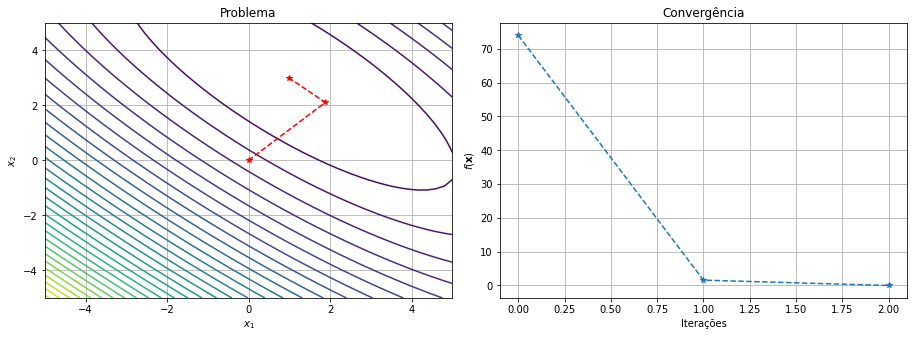

In [6]:
solucao = QuasiNewton(SecaoAurea(precisao=1e-2, passo=1e-3), maxit=2,
                             maxaval=5000).resolva(quadratica, x0)

print(solucao)
solucao.resultados(quadratica, [-5, 5], [-5, 5])

## Outras funções: Função de Freudenstein e Roth

\begin{equation}
    \min\limits_{\mathbf{x}} f(\mathbf{x}) = (-13 + x_1 + ((5-x_2)x_2 -2)x_2)^2 + (-29 + x_1 + ((x_2+1)x_2-14)x_2)^2
\end{equation}

Solução ótima: [5.00018842 3.99999686]
Número de iterações: 45
Número de avaliações: 703


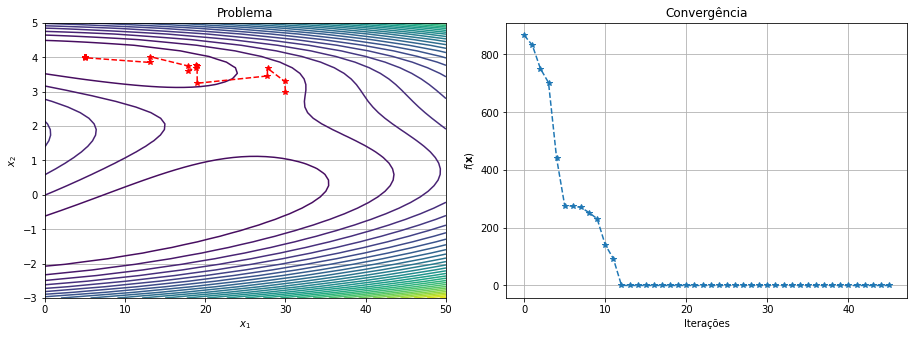

In [19]:
# Definição da função objetivo
def freudestein(x):
    x1, x2 = x[0], x[1]
    return (-13 + x1 + ((5-x2)*x2 -2)*x2)**2 + (-29 + x1 + ((x2+1)*x2-14)*x2)**2

x0 = [30., 3.]

solucao = GradienteConjugado(SecaoAurea(precisao=1e-2, passo=1e-4), maxit=1000,
                             maxaval=2000, precisao=1e-3).resolva(freudestein, x0)

print(solucao)
solucao.resultados(freudestein, [0, 50], [-3, 5])